In [452]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
l = np.zeros((len(t), 6))

def B_random(t):
    return np.random.randint(-5, 5, N)

def nonuniform(l, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = l
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B(t)/m
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 0, 1, 0, -1]



In [453]:
from scipy.integrate import odeint
random = odeint(nonuniform, p0, t, args=(B_random,))

TypeError: object of type 'float' has no len()

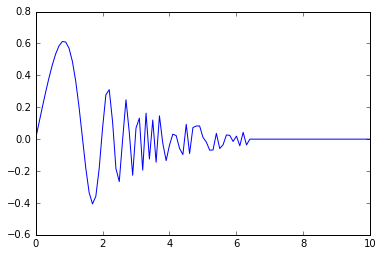

In [432]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t, random[:,0])
plt.show()

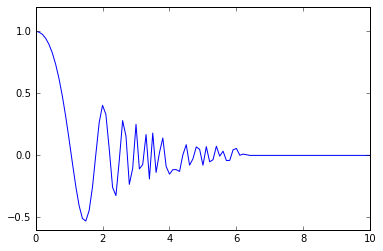

In [433]:
plt.plot(t, random[:,1])
plt.show()

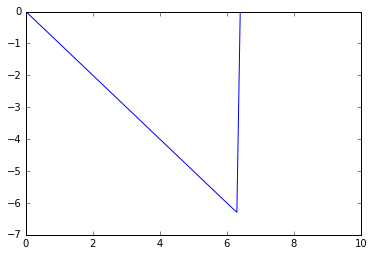

In [434]:
plt.plot(t, random[:,2])
plt.show()

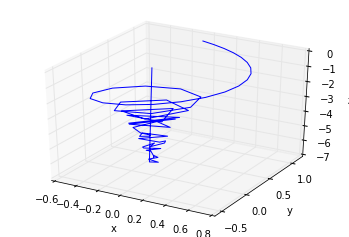

In [362]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [363]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 7))
B = 1

def uniform(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B/m
    
    #vx = -v*x/r
    #vy = -v*y/r
    
    a = q*v*B/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 10, 1, 0, -1]
p1 = [1, 0, 10, 0, 1, -1]


In [364]:
from scipy.integrate import odeint
uniformpart = odeint(uniform, p0, t, args=(B,))
uniform2    = odeint(uniform, p1, t, args=(B,))

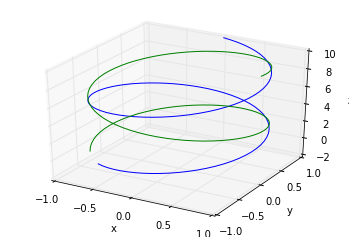

In [365]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(uniformpart[:,0], uniformpart[:,1], uniformpart[:,2])
ax.plot(uniform2[:,0], uniform2[:,1], uniform2[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

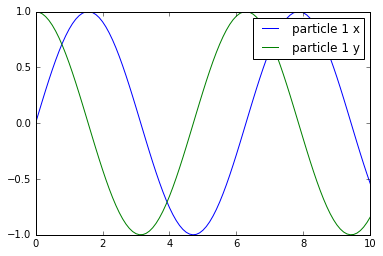

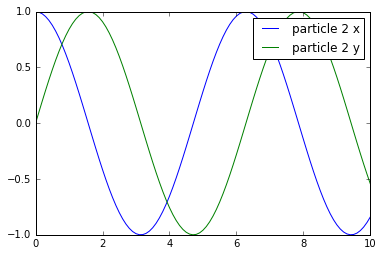

In [366]:
plt.plot(t, uniformpart[:,0], label="particle 1 x")
plt.plot(t, uniformpart[:,1], label="particle 1 y")
#plt.plot(t, uniform2[:,0], label="particle 2 x")
#plt.plot(t, uniform2[:,1], label="particle 2 y")
plt.legend()
plt.show()
#print uniformpart[:,0]
#print uniformpart[:,1]
#print uniform2[:,0]
#print uniform2[:,1]

plt.plot(t, uniform2[:,0], label="particle 2 x")
plt.plot(t, uniform2[:,1], label="particle 2 y")
plt.legend()
plt.show()


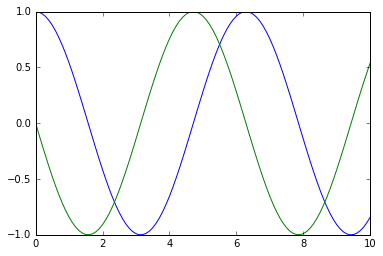

In [367]:
plt.plot(t, uniformpart[:,3])
plt.plot(t, uniformpart[:,4])
plt.plot(t, uniformpart[:,5])
plt.show()

In [300]:
energy = (1.0/2)*((uniformpart[:,3])**2 + (uniformpart[:,4])**2)
print energy

[ 0.5         0.5         0.5         0.5         0.5         0.49999998
  0.49999999  0.5         0.5         0.5         0.49999999  0.49999999
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999998
  0.49999998  0.49999998  0.49999998  0.49999998  0.49999998  0.49999997
  0.49999997  0.49999997  0.49999997  0.49999998  0.49999998  0.49999998
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999
  0.5         0.5         0.5         0.5         0.5         0.5
  0.50000001  0.50000001  0.50000001  0.50000001  0.50000001  0.50000002
  0.50000002  0.50000002  0.50000002  0.50000002  0.50000002  0.50000003
  0.50000003  0.50000003  0.50000003  0.50000003  0.50000004  0.50000004
  0.50000004  0.50000004  0.50000005  0.50000005  0.50000005  0.50000005
  0.50000005  0.50000006  0.50000006  0.50000006  0.50000006  0.50000007
  0.50000007  0.50000007  0.50000008  0.50000008  0.50000008  0.50000009
  0.50000009  0.50000009  0.5000001   0.5000001   0.500000

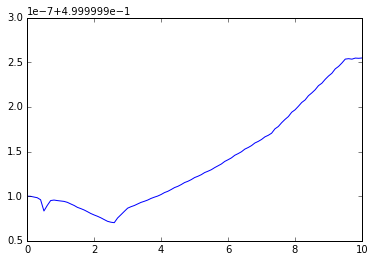

In [368]:
plt.plot(t, energy)
plt.show()

In [446]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 6))

def B_constant(t):
    return 1

def B_oscillating(t):
    return np.sin(2*np.pi*t)

def oscillating(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    v = q*r*B(t)/m
    #vx = vt*x/r
    #vy = vt*y/r
    #vz = vz
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0 #-a*(/r)
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 0, 1, 0, -1]


In [447]:
from scipy.integrate import odeint
oscilate = odeint(oscillating, p0, t, args=(B_oscillating,))

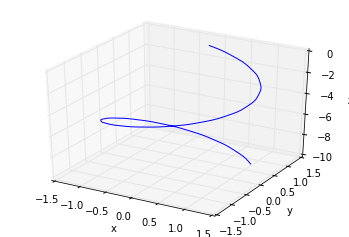

In [448]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(oscilate[:,0], oscilate[:,1], oscilate[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [449]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 12))
B = 1

def uniform2(u, t, B):              # t, u, B
    q = 1
    m = 1
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = u
    
    d = np.sqrt((x2-x1)**2 +(y2-y1)**2)
    d = np.sqrt(2)
    
    r1 = np.sqrt(x1**2 + y1**2)
    r2 = np.sqrt(x2**2 + y2**2)
    
    v1 = np.sqrt(vx1**2 + vy1**2)
    v1 = q*r1*B/m
    v2 = np.sqrt(vx2**2 + vy2**2)
    v2 = q*r2*B/m
    
    a1 = q*v1*B/m
    ax1 = -a1*(x1/r1)
    ay1 = -a1*(y1/r1)
    az1 = -a1*(z1/r1)
    
    a2 = q*v2*B/m
    ax2 = -a2*(x2/r2)
    ay2 = -a2*(y2/r2)
    az2 = -a2*(z2/r2)
    
    return vx1, vy1, vz1, ax1, ay1, az1, vx2, vy2, vz2, ax2, ay2, az2

p0 = [0,  1, 5, 0, 0, 0,
      0, -1, 5, 0, 0, -2]


In [450]:
twoparticles = odeint(uniform2, p0, t, args=(B,))

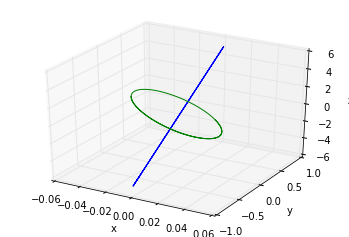

In [451]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(twoparticles[:,0], twoparticles[:,1], twoparticles[:,2])
ax.plot(twoparticles[:,6], twoparticles[:,7], twoparticles[:,8])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [339]:
p1 = [1, 0, 5, 0, 0, -1,
     -1, 0, 5, 0, 0, -1]

part2 = odeint(uniform2, p1, t, args=(B,))

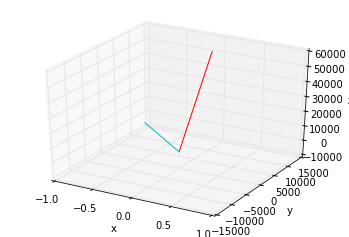

In [353]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(part2[:,0], part2[:,1], part2[:,2])
ax.plot(part2[:,6], part2[:,7], part2[:,8])

ax.plot(twoparticles[:,0], twoparticles[:,1], twoparticles[:,2])
ax.plot(twoparticles[:,6], twoparticles[:,7], twoparticles[:,8])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()